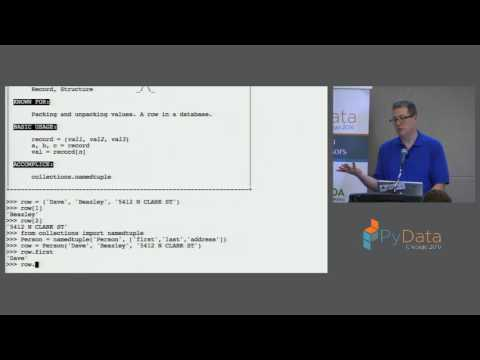

In [3]:
from IPython.display import YouTubeVideo
YouTubeVideo('lyDLAutA88s', width=800, height=300)

In [4]:
# 1. Посмотрите видео Дэвида Бизли про всроенные инструменты Python
# 2. Попробуйте используя встроенные инструменты Python проанизировать таблицу из файла "Vacancy.csv"
# 3. Попробуйте ответить на вопросы:
# Сколько вакансий, которые вам нравятся?
# Насколько свежие эти вакансии?
# Сколько вакансий с позициями на которых вы работаете?
# Сколько вакансий для аналатика данных?
# Сколько вакансий для аналитика данных с использованием Python?

# В задании важно не использовать pandas и numpy, а встроенные инструменты python
# Counter, CSV, defaultdict, sorted

In [5]:
import csv

In [42]:
import sys
from collections import Counter
import collections
from re import search

In [43]:
csv.field_size_limit(100000000)

100000000

In [24]:
vacs = list(csv.DictReader(open('Vacancy.csv', encoding='utf-8', newline='')))


In [25]:
len(vacs) # общее количество вакансий

4002

In [26]:
vacs[0] # анализируем ячейку первой вакансии в блоке  

{'id': '383479',
 'created_at': '2021-03-14 09:39:21.854462',
 'updated_at': '2021-03-14 09:39:21.854584',
 'vacid': '1474941',
 'vactitle': 'Senior java-разработчик (в команду Онбординга)',
 'vacdescription': ' Работа у нас — это:команда профессионалов, готовых поддержать ваши инициативы;мощное железо, дополнительные мониторы и всё, что нужно для продуктивной работы;обучение за счёт компании;гибкий графиккрасивый и комфортный офис  г. Санкт-Петербург, м. Ладожская  пл. Карла Фаберже 8 ВДМС;прозрачная система бонусов и премий, достойная зарплата — размер обсудим на собеседовании.Информация о проекте:Наша команда делает новые экспериментальные фичи для СБОЛа.Сейчас мы разрабатываем систему, с помощью которой разные команды Сбера смогут создавать квесты для мобильного приложения.Также мы будем разрабатывать внутреннюю платформу для продуктовых экспериментов. Описание команды:2-pizza team: сейчас у нас работают разработчики iOS и Android, продакт и аналитик. К команде в ближайшее время по

In [27]:
{ row['vacdate'] for row in vacs} # Вакансии по датам, самые первые были выложены 2020-10-15, исходя что на некоторые позиции могут искать до полу года, скорее всего они актуальные  

{'',
 '2020-10-15',
 '2020-10-16',
 '2020-10-19',
 '2020-10-20',
 '2020-10-21',
 '2020-10-23',
 '2020-10-26',
 '2020-10-27',
 '2020-10-28',
 '2020-10-29',
 '2020-10-30',
 '2020-11-02',
 '2020-11-05',
 '2020-11-06',
 '2020-11-09',
 '2020-11-10',
 '2020-11-11',
 '2020-11-12',
 '2020-11-13',
 '2020-11-16',
 '2020-11-17',
 '2020-11-18',
 '2020-11-19',
 '2020-11-20',
 '2020-11-23',
 '2020-11-24',
 '2020-11-25',
 '2020-11-26',
 '2020-11-27',
 '2020-11-30',
 '2020-12-01',
 '2020-12-02',
 '2020-12-03',
 '2020-12-04',
 '2020-12-07',
 '2020-12-08',
 '2020-12-09',
 '2020-12-10',
 '2020-12-11',
 '2020-12-14',
 '2020-12-15',
 '2020-12-16',
 '2020-12-17',
 '2020-12-18',
 '2020-12-21',
 '2020-12-22',
 '2020-12-24',
 '2020-12-25',
 '2020-12-28',
 '2020-12-29',
 '2020-12-30',
 '2020-12-31',
 '2021-01-03',
 '2021-01-08',
 '2021-01-10',
 '2021-01-11',
 '2021-01-12',
 '2021-01-13',
 '2021-01-14',
 '2021-01-15',
 '2021-01-18',
 '2021-01-19',
 '2021-01-20',
 '2021-01-21',
 '2021-01-22',
 '2021-01-23',
 '202

In [28]:
date = [row for row in vacs if row['vacdate'].startswith('2021-03')] # фильтруем вакансии по дате, выбираем только март 

In [29]:
len(date) # общее количество вакансий за март, на сам месяц приходится половина всех вакансий, вакансии достаточно свежие 

1986

In [30]:
{ row['vactitle'] for row in vacs} # делаем список всех заголовков вакансий 

{'Специалист по охране труда',
 'DPO (Корпоративно-инвестиционный блок)',
 'Юрисконсульт',
 'Сетевой администратор',
 'QlikSense разработчик',
 'Senior QA',
 'Аналитик данных в команду «Инфраструктура данных»',
 'Product manager',
 'Data Scientist (PFM, блок Управление Благосостоянием)',
 'Главный инженера по сопровождению(команда Заботы о клиентах)',
 'Системный аналитик на продукт: «Конструктор и визуализация бизнес-метрик»',
 'Мобильный менеджер по продажам',
 'Разработчик Java',
 'Стажер Sberseasons Право весна',
 'Инженер 1 линии поддержки',
 'Senior Data Scientist',
 'QA-инженер auto',
 'Старший менеджер по обслуживанию (с.Парная)',
 'Технологический руководитель команды',
 'Senior DevOps-инженер',
 'Аналитик',
 'Руководитель направления Центра организации обработки и защиты персональных данных',
 'Старший кассир',
 'Senior Java разработчик на Инвестиционную платформу юридических лиц в Сбер',
 'DE ML',
 'Главный специалист сектора развития инфраструктуры',
 'Системный аналитик (п

In [133]:
AN1 = [row for row in vacs if row['vactitle'].count('Аналитик данных')]
AN2 = [row for row in vacs if row['vactitle'].count('aналитик данных')]
AN3 = [row for row in vacs if row['vactitle'].count('Data analyst')]
AN = (AN1 + AN2 + AN3)
#делаем выборку вакансий с заголовком аналитик данных 


In [134]:
len(AN) #Общее количество вакансий для Аналитика данных

25

In [135]:
{ row['vactitle'] for row in AN} # Заголовки вакансий для Аналитиков данных


{'Data analyst',
 'Data analyst (Python)',
 'Data analyst (Казначейство)',
 'Data analyst (в Лабораторию клиентского опыта)',
 'Data analyst (внедрение моделей)',
 'Data analyst. Аналитик данных в трайб «Массовая персонализация».',
 'Data analyst. Стажера - Аналитик (кластер Персональные предложения)',
 'Senior Data analyst (блок УБ, команда инвестиционных продуктов)',
 'Аналитик данных',
 'Аналитик данных (Корпоративно-Инвестиционный блок)',
 'Аналитик данных (аналитические витрины)',
 'Аналитик данных (проект СберID)',
 'Аналитик данных AI',
 'Аналитик данных в команду «Голосовые сценарии. Платежи и переводы»',
 'Аналитик данных в команду «Инфраструктура данных»',
 'Аналитик данных по затратам и ресурсам',
 'Аналитик данных/Администратор проектов',
 'Аналитик данных/администратор проектов',
 'Стажер Data engineer/Data analyst'}

In [125]:
ANP = [row for row in AN if row['vacdescription'].count('Python')] # Делаем выборку вакансий аналитика данных с использованием Python


In [136]:
len(ANP) # примерно в 40 процентах вакансий аналитику данных требуется навыки в Python

11

In [137]:
M = [row for row in vacs if row['vactitle'].count('Специалист отдела телемаркетинга')] # делаем выборку вакасий на которых я в данный момент работаю

In [139]:
len(M) #количество вакансий на которых я в данный момент работаю

1

[{'id': '386691',
  'created_at': '2021-03-14 09:39:21.854462',
  'updated_at': '2021-03-14 09:39:21.854584',
  'vacid': '149818',
  'vactitle': 'Специалист отдела телемаркетинга',
  'vacdescription': 'Мы предлагаем тебе:фиксированный оклад плюс система премий по результатам твоей работы;выбрать - пятидневная рабочая неделя или график два через дваоформление согласно трудовому кодексукорпоративное обучениепомощь наставника и руководителяактивную корпоративную жизнь: праздники, спортивные мероприятия, общение с коллегамимедицинская страховкаматериальная поддержка в особых случаяхскидки на продукты Сбербанка. В нашей дружной команде ты изменишь к лучшему жизнь людей вокруг себя – присоединяйся!Специалист отдела «Телемаркетинг» – это возможность начать карьеру в ведущем банке страны, не имея специального образования и опыта. Это работа для энергичных и общительных людей, способных понять клиента и предложить максимально подходящий ему продукт. Здесь тебе помогут быстро освоиться в банковс